2021-06-05 17:39:12,226	INFO worker.py:640 -- Connecting to existing Ray cluster at address: 192.168.1.34:6379


ObjectRef(380ca2f4eadfd5a8ffffffffffffffffffffffff0200000001000000)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


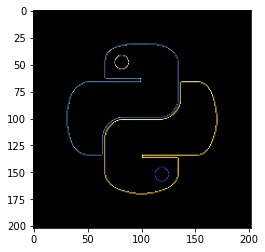

In [1]:
import zmq
import ray
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.signal import convolve2d


ray.init(address="auto")

@ray.remote
def rgb_convolve2d(image):
    kernel=np.array([[0,1,0], [1,-4,1], [0,1,0]])
    
    red = convolve2d(image[:,:,0], kernel)
    green = convolve2d(image[:,:,1], kernel)
    blue = convolve2d(image[:,:,2], kernel)
    
    return np.stack([red, green, blue], axis=2)



img = mpimg.imread('./dataset/python.png')

object_ids = [rgb_convolve2d.remote(img) for _ in range(10)]
print(object_ids[0])
data=ray.get(object_ids)
plt.imshow(data[5])

ray.shutdown()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


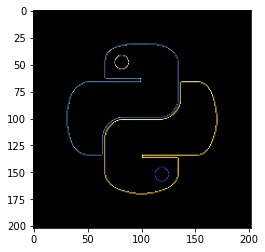

In [2]:
plt.imshow(data[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


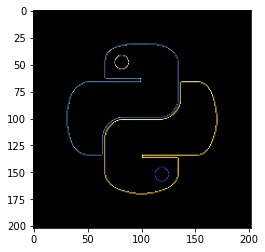

In [3]:
plt.imshow(data[0])